# Life-Cycle Labor Supply of Couples with Children

## Setup

In [ ]:
%load_ext autoreload
%autoreload 2

import numpy as np
import numba as nb

import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

# Dual-Earner Model with Children

In [ ]:
# load local model file and initialize model class
from DynHouseholdLaborModel import DynHouseholdLaborModelClass
model = DynHouseholdLaborModelClass()

par = model.par
sol = model.sol
sim = model.sim

In [3]:
%time model.solve()

CPU times: user 3.36 s, sys: 20.2 ms, total: 3.38 s
Wall time: 3.4 s


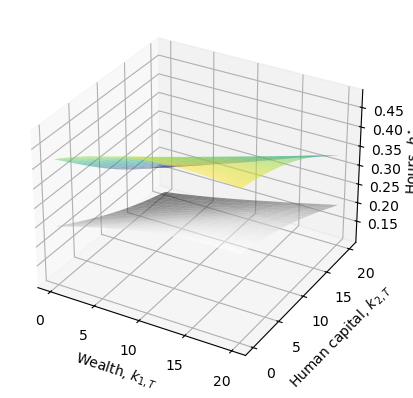

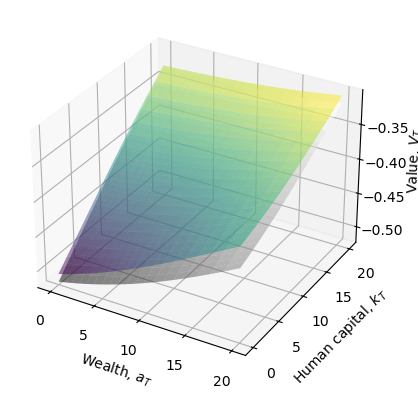

In [4]:
k1_mesh,k2_mesh = np.meshgrid(par.k_grid,par.k_grid,indexing='ij')

# first period
t = 0
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(k1_mesh, k2_mesh, sol.h1[t,0],rstride=1,cstride=1,cmap='viridis', edgecolor='none',alpha=0.5);
ax.plot_surface(k1_mesh, k2_mesh, sol.h1[t,1],rstride=1,cstride=1,cmap='gray', edgecolor='none',alpha=0.5);
ax.set(xlabel='Wealth, $k_{1,T}$',ylabel='Human capital, $k_{2,T}$',zlabel='Hours, $h_{T}^{\star}$');

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(k1_mesh, k2_mesh, sol.V[t,0],rstride=1,cstride=1,cmap='viridis', edgecolor='none',alpha=0.5);
ax.plot_surface(k1_mesh, k2_mesh, sol.V[t,1],rstride=1,cstride=1,cmap='gray', edgecolor='none',alpha=0.5);
ax.set(xlabel='Wealth, $a_{T}$',ylabel='Human capital, $k_T$',zlabel='Value, $V_{T}$');

# Simulate child-related transfers reforms

In [5]:
model.simulate()

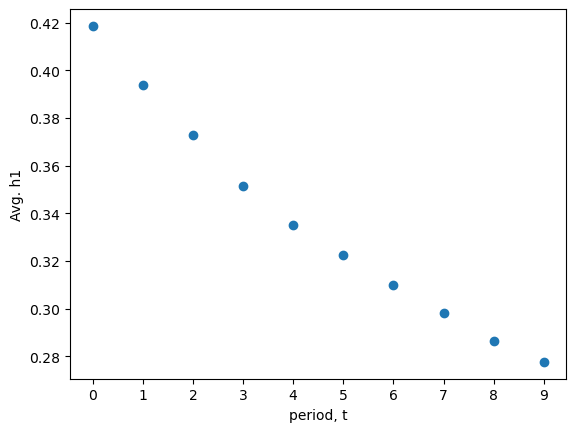

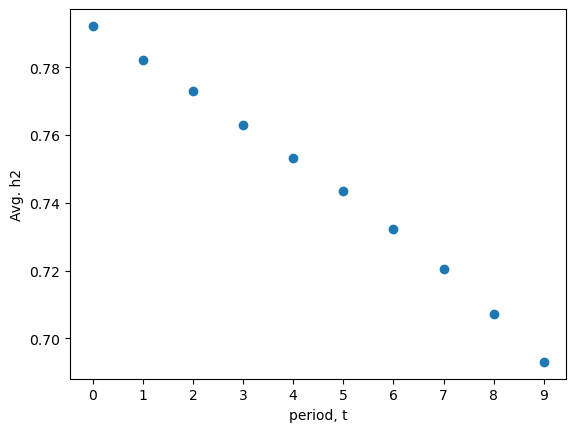

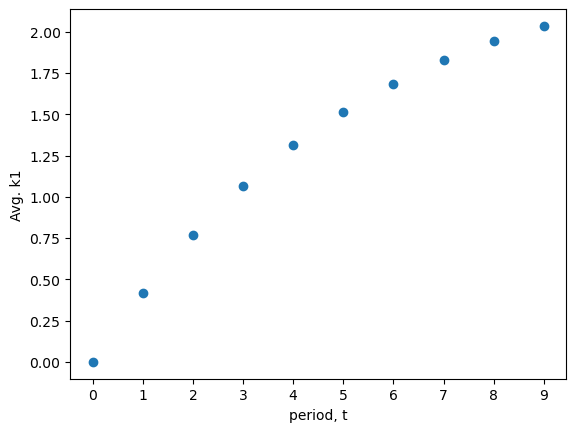

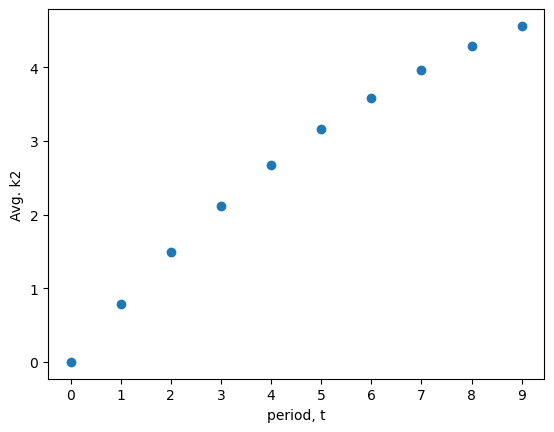

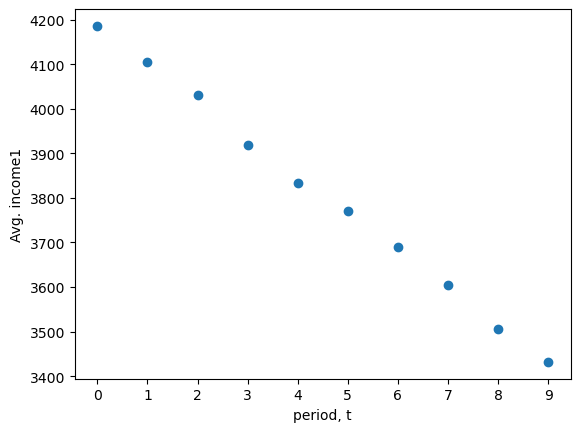

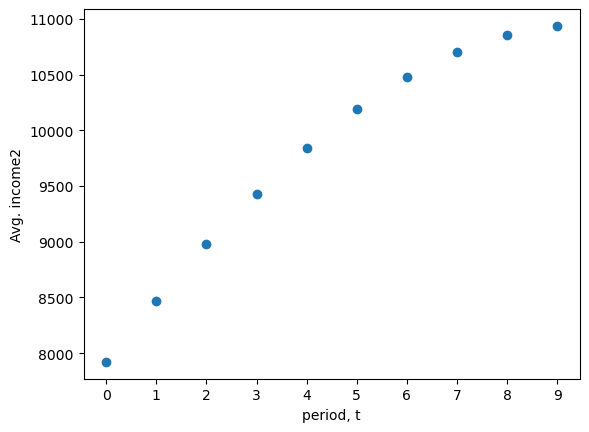

In [6]:
# plot behavior
for var in ('h1','h2','k1','k2','income1','income2'):
    fig, ax = plt.subplots()
    ax.scatter(range(par.simT),np.mean(getattr(sim,var),axis=0),label='Simulated')
    ax.set(xlabel='period, t',ylabel=f'Avg. {var}',xticks=range(par.simT));

In [7]:
model_no_transfers = DynHouseholdLaborModelClass(par={'uncon_uni': 0.0, 'means_level': 0.0, 'means_slope': 0.0, 'cond':0.0, 'cond_high': 0.0})
model_uncon_uni = DynHouseholdLaborModelClass(par={'uncon_uni': 5000.0, 'means_level': 0.0, 'means_slope': 0.0, 'cond':0.0, 'cond_high': 0.0})
model_uncon_means = DynHouseholdLaborModelClass(par={'uncon_uni': 0.0, 'means_level': 1000.0, 'means_slope': 25.0, 'cond':0.0, 'cond_high': 0.0})
model_con_uni = DynHouseholdLaborModelClass(par={'uncon_uni': 0.0, 'means_level': 0.0, 'means_slope': 0.0, 'cond':8000.0, 'cond_high': 0.0})
model_con_means = DynHouseholdLaborModelClass(par={'uncon_uni': 0.0, 'means_level': 0.0, 'means_slope': 0.0, 'cond':8000.0, 'cond_high': -1500})

In [8]:
model_no_transfers.solve()
model_no_transfers.simulate()

model_uncon_uni.solve()
model_uncon_uni.simulate()

model_uncon_means.solve()
model_uncon_means.simulate()

model_con_uni.solve()
model_con_uni.simulate()

model_con_means.solve()
model_con_means.simulate()


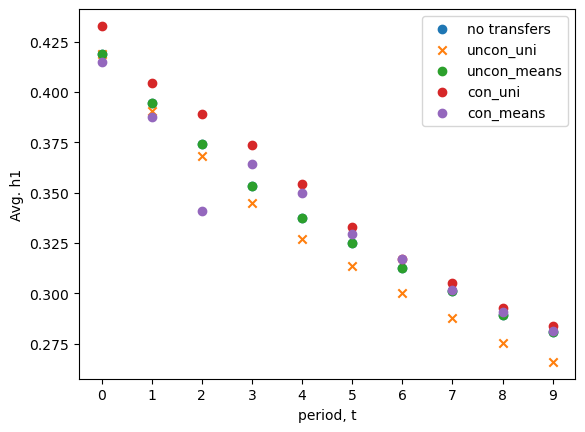

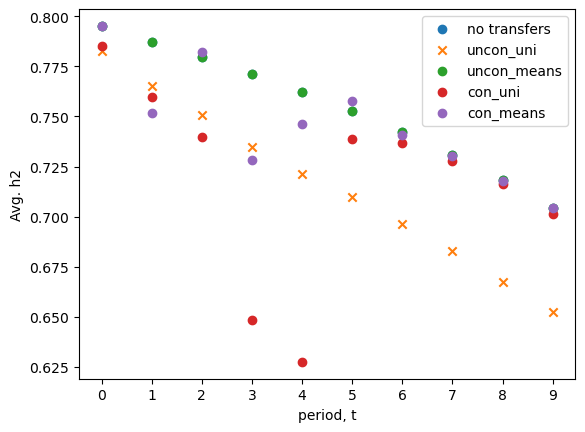

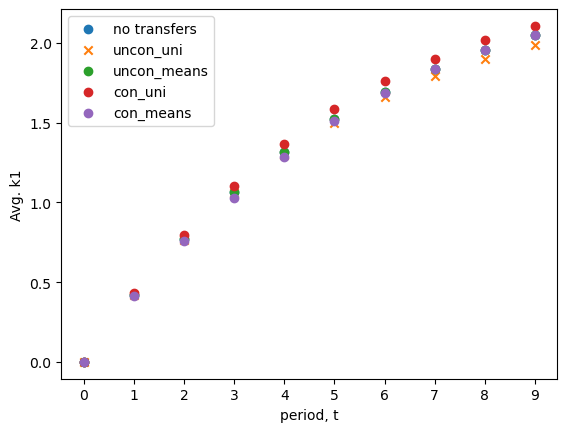

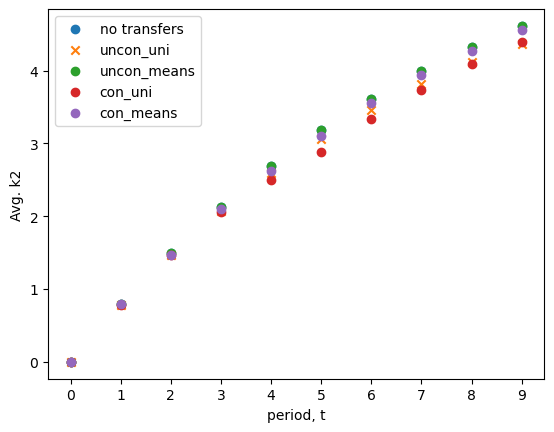

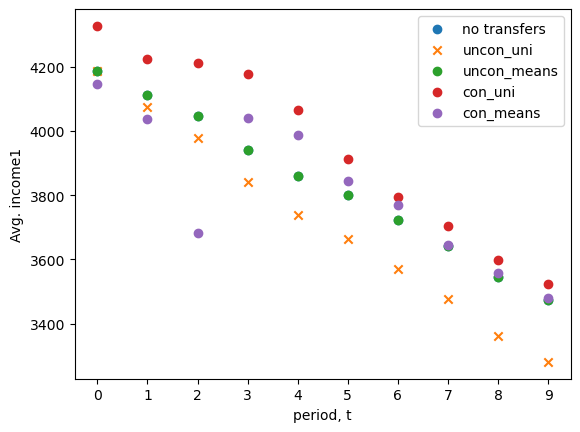

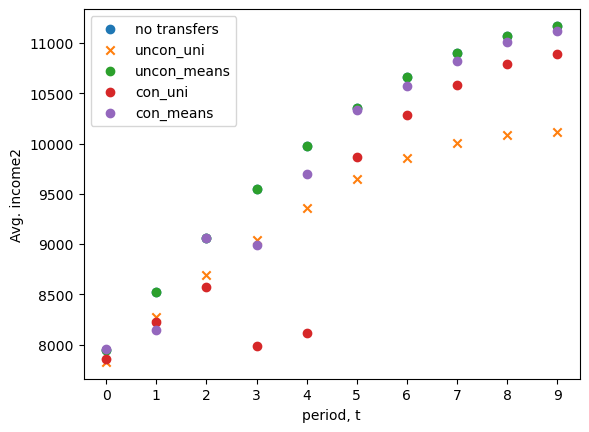

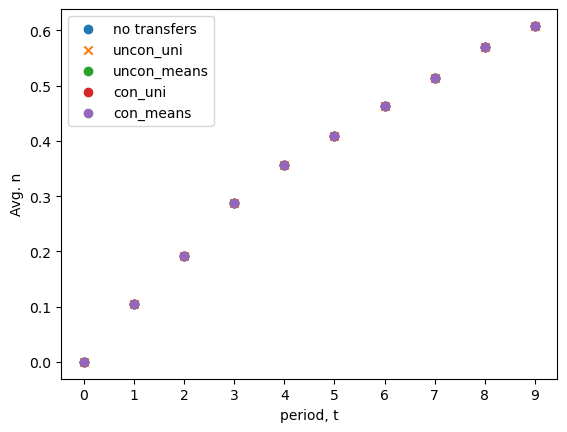

In [9]:


# plot behavior
for var in ('h1','h2','k1','k2','income1','income2', 'n'):
    fig, ax = plt.subplots()
    ax.scatter(range(par.simT),np.mean(getattr(model_no_transfers.sim,var),axis=0),label='no transfers')
    ax.scatter(range(par.simT),np.mean(getattr(model_uncon_uni.sim,var),axis=0),label='uncon_uni', marker = 'x')
    ax.scatter(range(par.simT),np.mean(getattr(model_uncon_means.sim,var),axis=0),label='uncon_means')
    ax.scatter(range(par.simT),np.mean(getattr(model_con_uni.sim,var),axis=0),label='con_uni')
    ax.scatter(range(par.simT),np.mean(getattr(model_con_means.sim,var),axis=0),label='con_means')
    ax.set(xlabel='period, t',ylabel=f'Avg. {var}',xticks=range(par.simT));
    ax.legend();

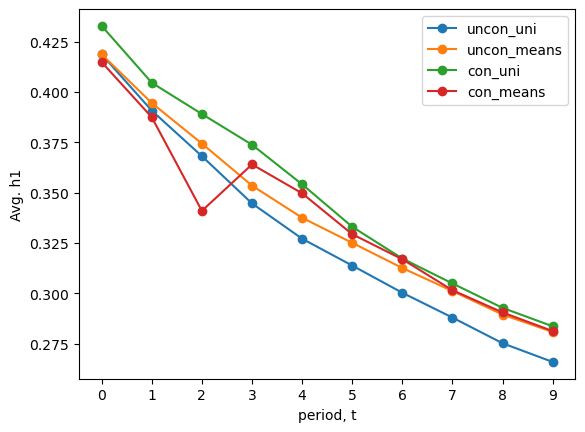

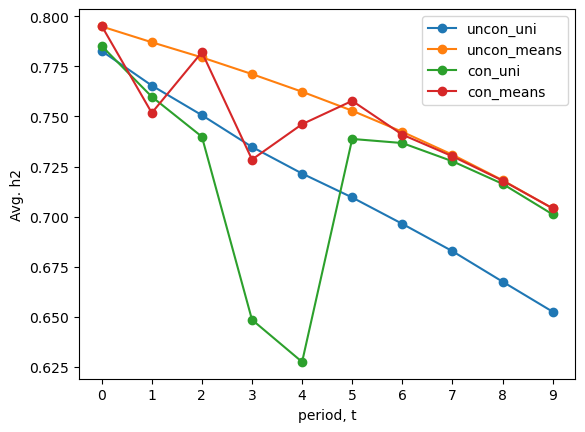

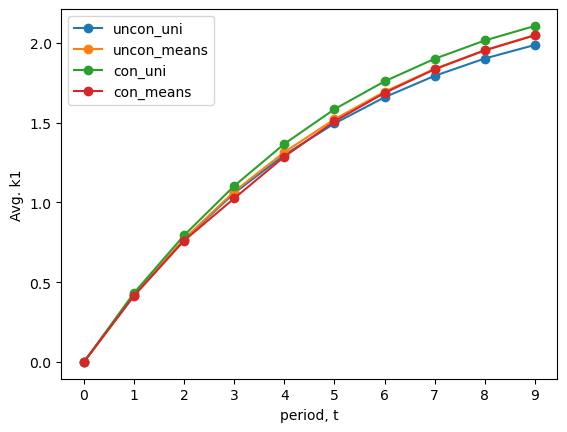

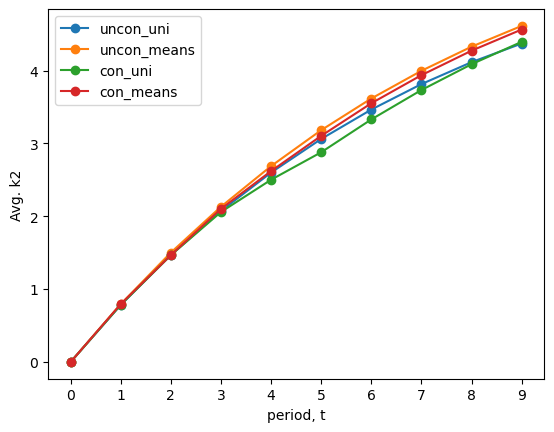

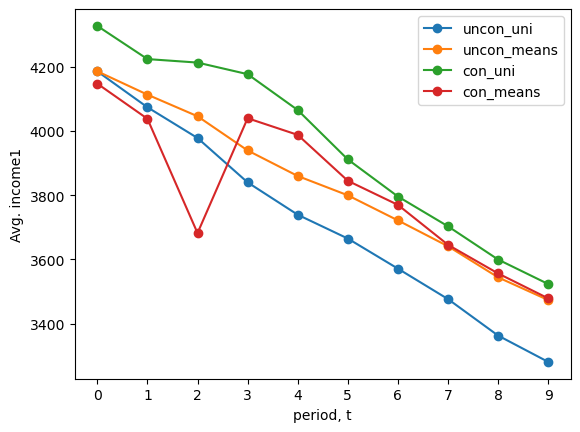

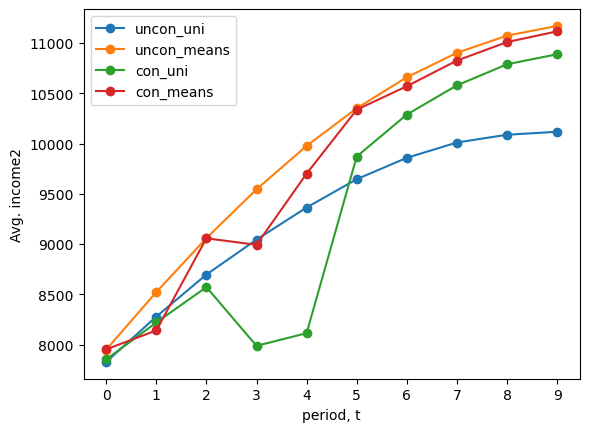

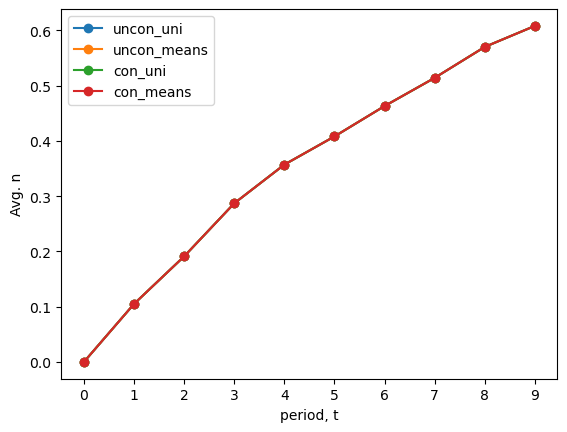

In [13]:
# Plot behavior
for var in ('h1', 'h2', 'k1', 'k2', 'income1', 'income2', 'n'):
    fig, ax = plt.subplots()
    #ax.plot(range(par.simT), np.mean(getattr(model_no_transfers.sim, var), axis=0), label='no transfers', marker = 'o')
    ax.plot(range(par.simT), np.mean(getattr(model_uncon_uni.sim, var), axis=0), label='uncon_uni', marker = 'o')
    ax.plot(range(par.simT), np.mean(getattr(model_uncon_means.sim, var), axis=0), label='uncon_means', marker = 'o')
    ax.plot(range(par.simT), np.mean(getattr(model_con_uni.sim, var), axis=0), label='con_uni', marker = 'o')
    ax.plot(range(par.simT), np.mean(getattr(model_con_means.sim, var), axis=0), label='con_means', marker = 'o')
    ax.set(xlabel='period, t', ylabel=f'Avg. {var}', xticks=range(par.simT))
    ax.legend()
    plt.show()
